In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


`DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)`


In [2]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')

pkmn_types.shape
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [3]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [4]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

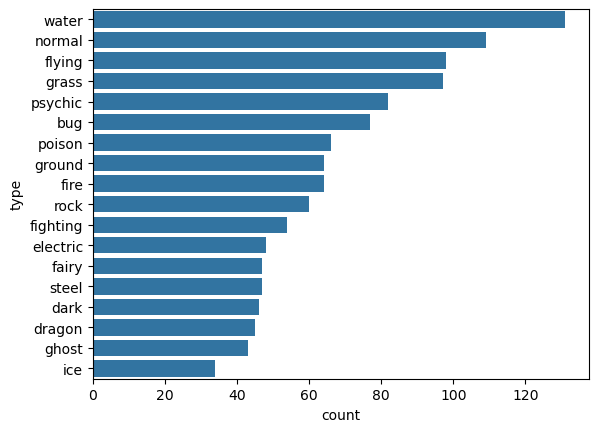

In [5]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

In [6]:
n_pokemon = pkmn_types['type'].value_counts().sum()

max_type_count = type_counts[0]

max_prop = max_type_count / n_pokemon
print(n_pokemon, max_type_count, max_prop)

1212 131 0.10808580858085809


In [7]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [8]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

Text(0.5, 0, 'proportion')

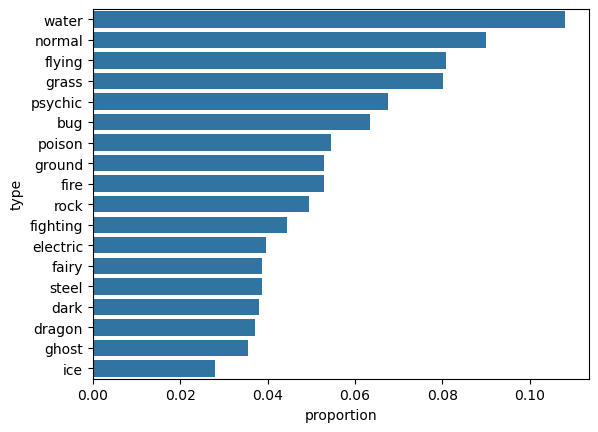

In [9]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order = type_order )

plt.xticks(tick_props * n_pokemon ,tick_names)
plt.xlabel('proportion')

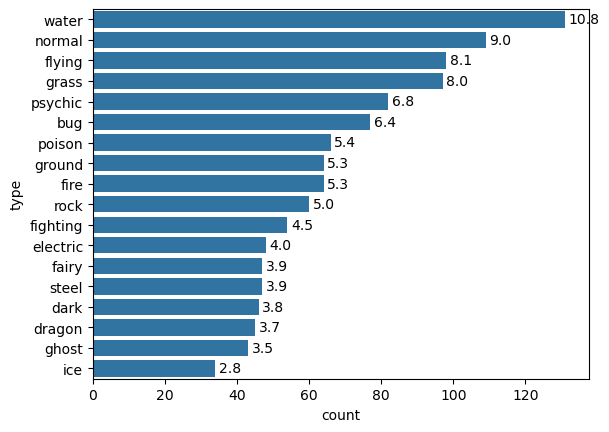

In [10]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order = type_order )

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    
    plt.text(count+1, i, pct_string, va='center')

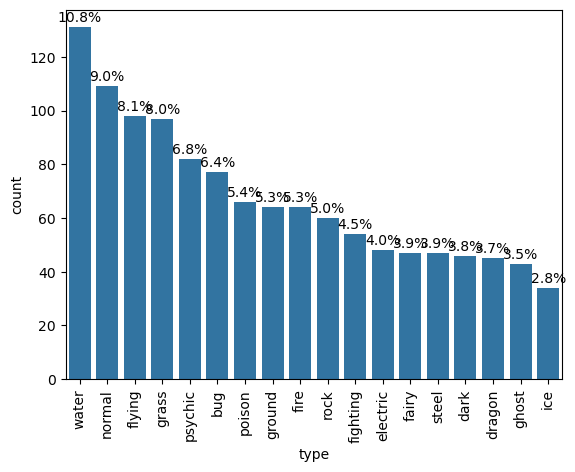

In [11]:
from matplotlib import rcParams

sb.countplot(data=pkmn_types, x='type', color=base_color, order = type_order )

type_counts = pkmn_types['type'].value_counts()

locs, labels = plt.xticks(rotation=90)

rcParams['figure.figsize'] = 12,4

for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(loc, count+2, pct_string, ha='center', color='black')

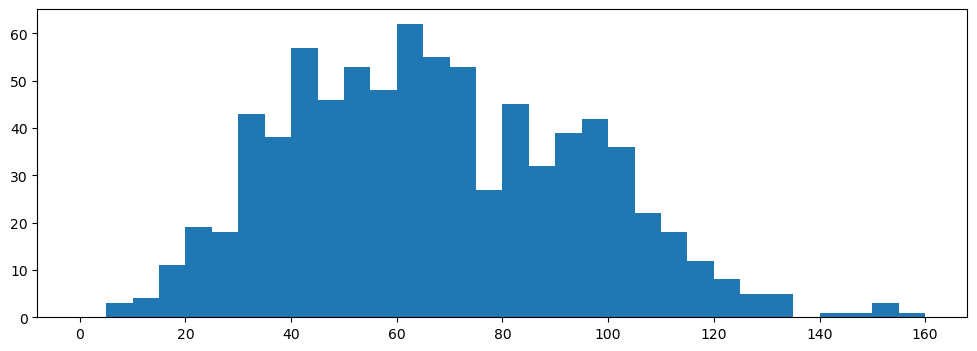

In [12]:
bins = np.arange(0, pokemon['speed'].max()+5,5)
plt.hist(data=pokemon, x='speed', bins=bins);

/tmp/ipykernel_764835/2260785915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(pokemon['speed'], kde=False);


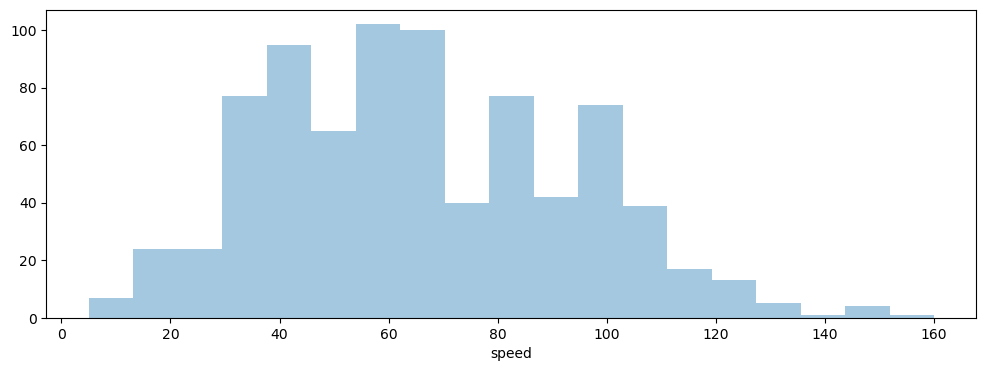

In [13]:
sb.distplot(pokemon['speed'], kde=False);

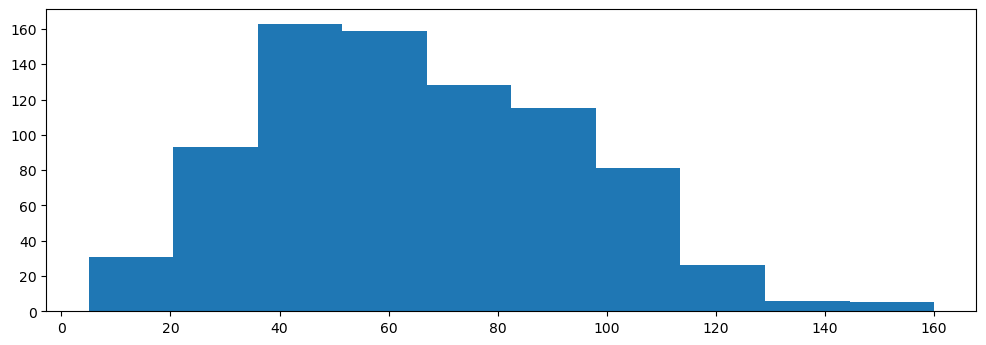

In [14]:
fig = plt.figure()

ax = fig.add_axes([.125,.125,.775,.755])
ax.hist(data=pokemon, x='speed');

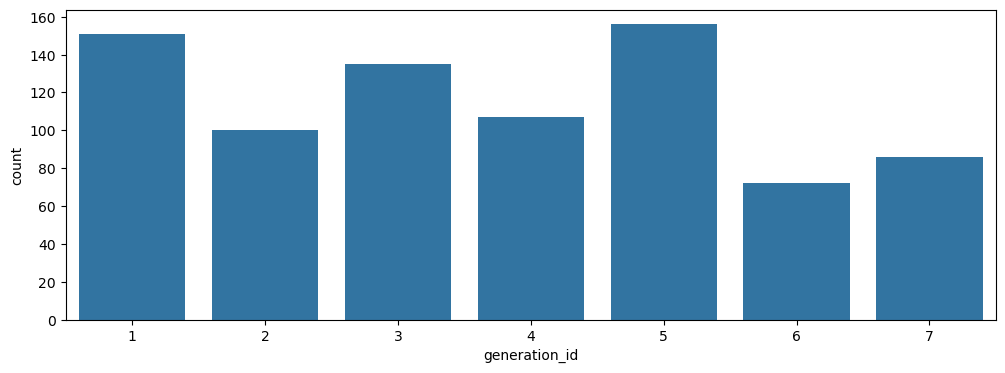

In [15]:
fig = plt.figure()
ax = fig.add_axes([.125,.125,.775,.775])
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color, ax=ax);

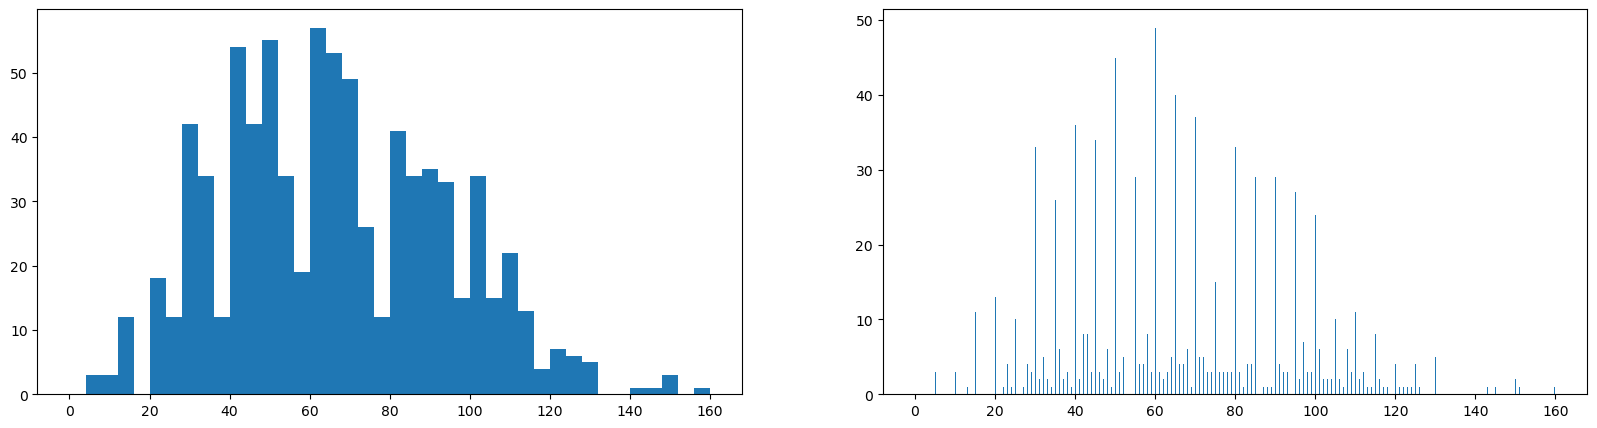

In [16]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins = np.arange(0, pokemon['speed'].max()+4,4)
plt.hist(data=pokemon, x='speed', bins=bins);

plt.subplot(1,2,2)  
bins = np.arange(0, pokemon['speed'].max()+1/4,1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

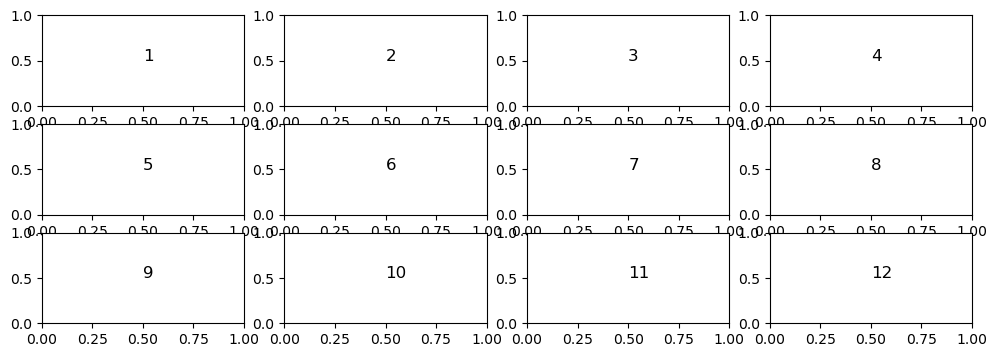

In [17]:
fig, axes = plt.subplots(3,4)
axes = axes.flatten()
for i in range(12):
    plt.sca(axes[i])
    plt.text(0.5, 0.5, i+1, fontsize=12)

(0.0, 6.0)

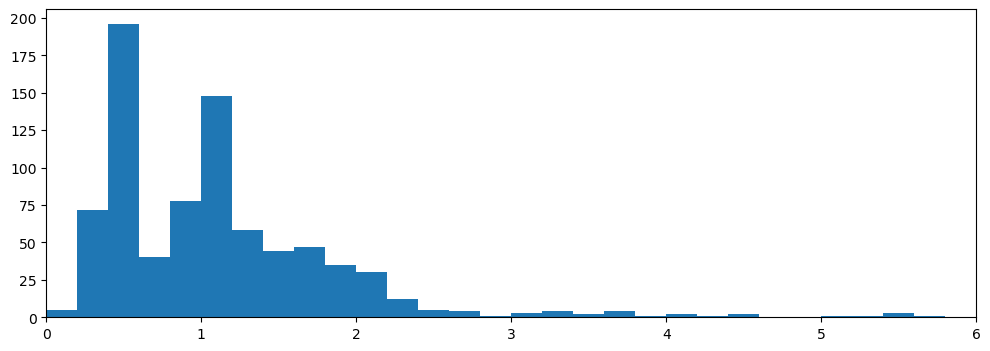

In [21]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);
plt.xlim(0,6)

(0.0, 6.0)

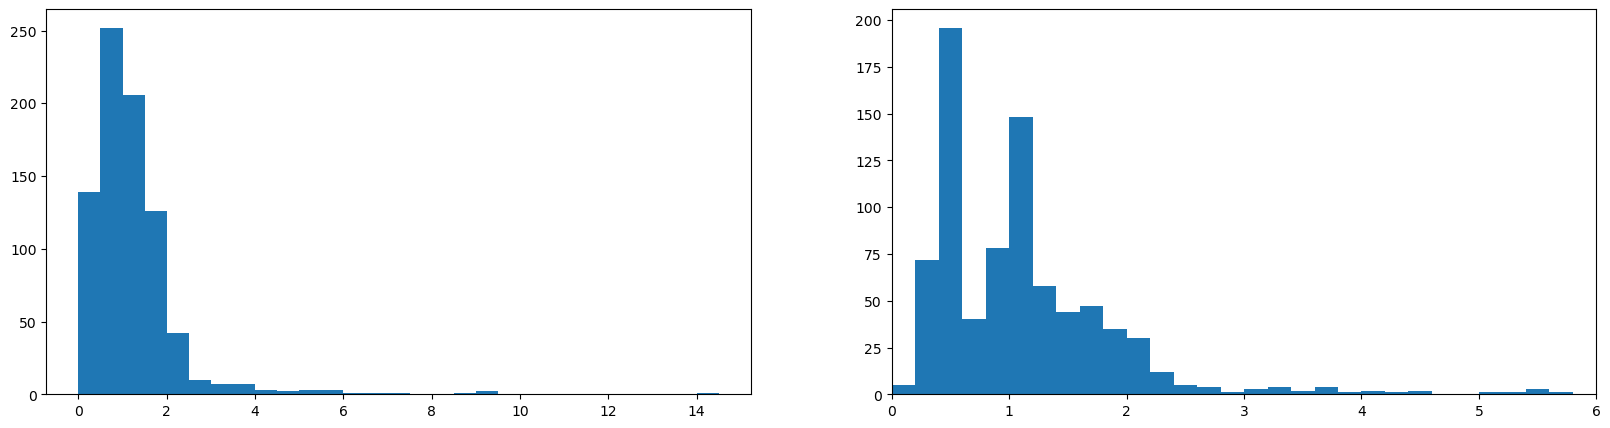

In [28]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins = np.arange(0, pokemon['height'].max()+0.5,0.5)
plt.hist(data=pokemon, x='height', bins=bins);

plt.subplot(1,2,2)
bins = np.arange(0, pokemon['height'].max()+0.2,0.2)
plt.hist(data=pokemon, x='height', bins=bins);
plt.xlim(0,6)